## Logistic Regression

Logistic Regression is very similar to linear regression, except all of the points can only have $y$-values of $1$ or $0$. This is useful if we want to predict whether something is or isn't part of a particular class. Instead of fitting a line (as in linear regression), logistic regression involves fitting a probability curve.

For example, using our device traffic, let's see whether we can predict a DNS packet is request or response from its length. 

First, let's import the data, extract only the DNS packets, and view the first few packets.

In [1]:
# Pandas, Numpy
import numpy as np
import pandas as pd

import logging
logging.getLogger("scapy.runtime").setLevel(logging.ERROR)

# Machine Learning
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

import sys
#sys.path.insert(1,"/Users/feamster/research/netml/src/")
import netml
from netml.pparser.parser import PCAP

In [2]:
hpcap = PCAP('data/http.pcap', flow_ptks_thres=2, verbose=10)

hpcap.pcap2pandas()
pcap = hpcap.df

'_pcap2pandas()' starts at 2023-11-06 15:38:54
'_pcap2pandas()' ends at 2023-11-06 15:39:08 and takes 0.2311 mins.


Each row in the printed data is a packet and each column is a feature of the packet.

Next let's divide the DNS packets into requests and repsonses, and convert them into points where the $x$-value is the length of the packet and $y$-value is $0$ for requests and $1$ for responses. This will allow us to fit the data to a logistic regression curve.

In [19]:
lengths = pcap[['length','dns_resp']]

In [30]:
lengths['dns_resp'] = lengths['dns_resp'].fillna(0)
lengths['dns_resp'][lengths['dns_resp'] != 0] = 1
lengths.head

C:\Users\doubl\AppData\Local\Temp\ipykernel_14116\240840997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lengths['dns_resp'] = lengths['dns_resp'].fillna(0)
C:\Users\doubl\AppData\Local\Temp\ipykernel_14116\240840997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lengths['dns_resp'][lengths['dns_resp'] != 0] = 1


<bound method NDFrame.head of        length  dns_resp
0         109         0
1          66         0
2         106         0
3          66         0
4          60         0
...       ...       ...
24793      66         0
24794      66         0
24795      66         0
24796      66         0
24797      66         0

[24798 rows x 2 columns]>

Let's see how many data points we have.

Next we will convert the DNS response column into a 0/1 value so that it is amenable to logstic regression.

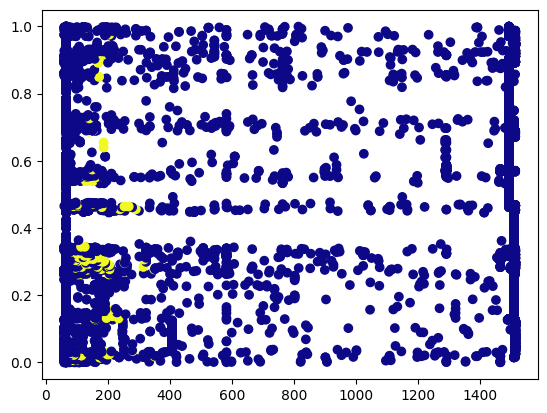

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random
X = lengths.drop(columns=['dns_resp'])
y = lengths['dns_resp']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X, y)
model.score(X, y)
plt.scatter(lengths['length'], np.arange(0, 1, 1/len(X)),
            c=lengths['dns_resp'], cmap='plasma')
plt.show()
